  ## Importing necessary libraries

In [1]:

from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Lets start by reading the Diabetes Data 

In [2]:
diabetes = pd.read_csv("C:\\my-github-projects\\Diabetes-Disease-Prediction\\diabetes.csv")

In [3]:
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.shape

(768, 9)

In [7]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Check if our Dataset have any Zero Values

In [8]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
check=diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
check.isin([0]).any().any()

True

In [10]:
check=check.replace(0,np.nan)
check.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,183.0,64.0,NaN,NaN,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33


In [11]:
check.isnull()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,True,True,False,False,False
6,False,False,False,False,False,False,False
7,False,True,True,True,False,False,False
8,False,False,False,False,False,False,False
9,False,False,True,True,True,False,False


In [11]:
## 1 -step make the list of features which has missing values
features_with_na=[features for features in check.columns if check[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(check[feature].isnull().mean(), 4),  ' % missing values')

Glucose 0.0065  % missing values
BloodPressure 0.0456  % missing values
SkinThickness 0.2956  % missing values
Insulin 0.487  % missing values
BMI 0.0143  % missing values


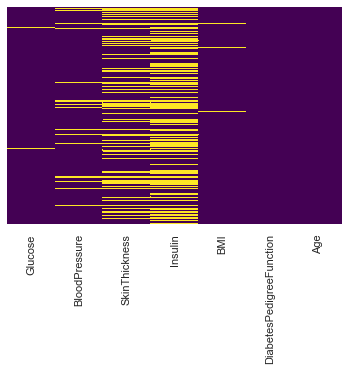

In [12]:
sns.heatmap(check.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [13]:
# proportion of diabetes patients (about 35% having diabetes)
diabetes.Outcome.value_counts()[1] / diabetes.Outcome.count()

0.3489583333333333

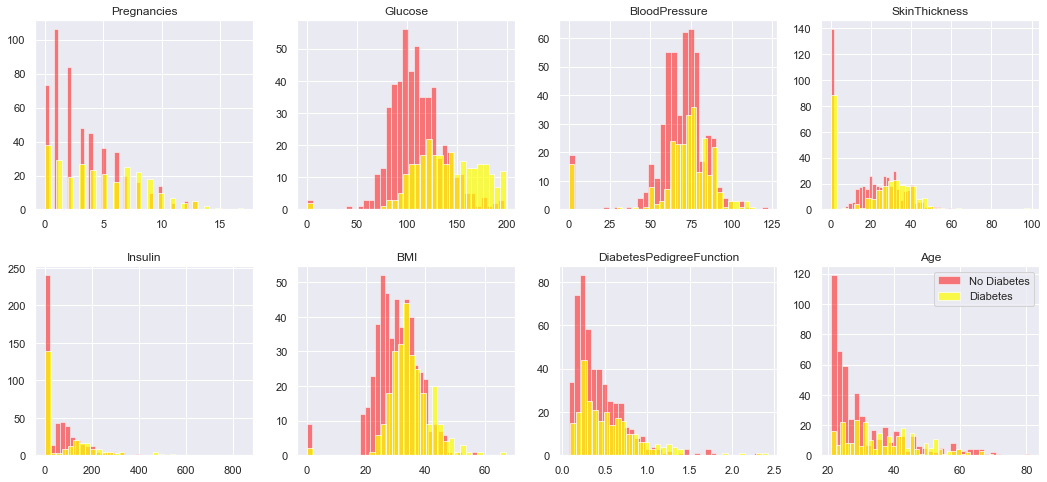

In [14]:
# To analyse feature-outcome distribution in visualisation
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     diabetes[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    diabetes[diabetes.Outcome==0][feature].hist(bins=35, color='red', alpha=0.5, ax=ax[row, col]).set_title(feature)
    diabetes[diabetes.Outcome==1][feature].hist(bins=35, color='yellow', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

0    500
1    268
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Diabetes Outcome')

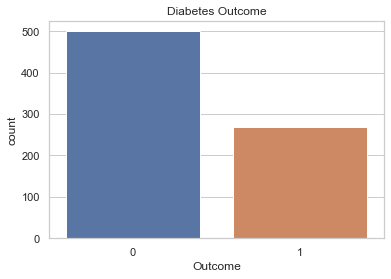

In [15]:
sns.set_style('whitegrid')
print(diabetes.Outcome.value_counts())
sns.countplot('Outcome',data=diabetes).set_title('Diabetes Outcome')

In [16]:
list_diabetes=[268,500]
list_labels=['Diabetic','Healthy']


([<matplotlib.patches.Wedge at 0x2496a555080>,
 [Text(1.0051884653130878, 1.9569353972989298, 'Diabetic'),
  Text(-1.0051882820915679, -1.9569354914114576, 'Healthy')],
 [Text(0.5482846174435024, 1.067419307617598, '34.9%'),
  Text(-0.5482845175044915, -1.067419358951704, '65.1%')])

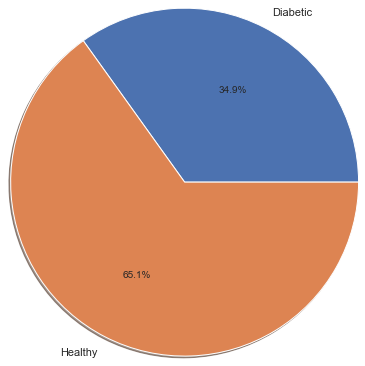

In [17]:
plt.axis('equal')
plt.pie(list_diabetes,labels=list_labels,radius=2,autopct="%0.1f%%",shadow=True)

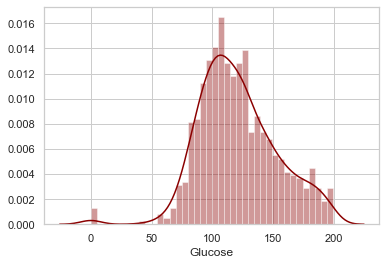

In [18]:
sns.distplot(diabetes['Glucose'],kde=True,color='darkred',bins=40)
sns.set()

In [19]:
def plot_prob_density(diabetes_Glucose,diabetes_BloodPressure):
    plt.figure(figsize = (10, 7))

    unit = 1.5
    x = np.linspace(Glucose.min() - unit, Glucose.max() + unit, 1000)[:, np.newaxis]
    

    # Plot the data using a normalized histogram
    plt.hist(df_lunch, bins=10, density=True, label='Glucose', color='orange', alpha=0.2)
    plt.hist(diabetes_BloodPressure, bins=10, density=True, label='BloodPressure', color='navy', alpha=0.2)
   
    # Do kernel density estimation
    kd_Glucose = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(df_lunch)
    kd_BloodPressure = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(df_lunch)
    

    
    # Plot the estimated densty
    kd_vals_Glucose = np.exp(kd_Glucose.score_samples(x))
    kd_vals_BloodPressure = np.exp(kd_BloodPressure.score_samples(x))
    

    plt.plot(x, kd_vals_Glucose, color='orange')
    plt.plot(x, kd_vals_Glucose, color='navy')
    
    
    plt.axvline(x=x_start,color='red',linestyle='dashed')
    plt.axvline(x=x_end,color='red',linestyle='dashed')
    

    # Show the plots
    plt.xlabel(field, fontsize=15)
    plt.ylabel('Probability Density', fontsize=15)
    plt.legend(fontsize=15)
    plt.show()
    gc.collect()
    return kd_Glucose

In [20]:
def get_probability(start_value, end_value, eval_points, kd):
    
    # Number of evaluation points 
    N = eval_points                                      
    step = (end_value - start_value) / (N - 1)  # Step size

    x = np.linspace(start_value, end_value, N)[:, np.newaxis]  # Generate values in the range
    kd_vals = np.exp(kd.score_samples(x))  # Get PDF values for each x
    probability = np.sum(kd_vals * step)  # Approximate the integral of the PDF
    return probability.round(4)

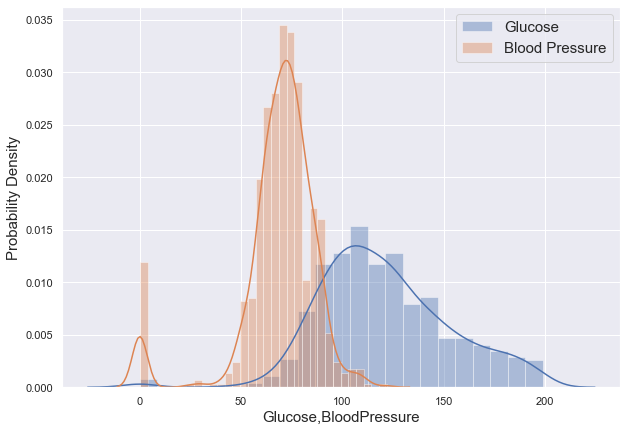

In [21]:
plt.figure(figsize = (10, 7))
sns.distplot(diabetes['Glucose'], label='Glucose')
sns.distplot(diabetes['BloodPressure'], label='Blood Pressure')
plt.xlabel('Glucose,BloodPressure', fontsize=15)
plt.ylabel('Probability Density', fontsize=15)
plt.legend(fontsize=15)
plt.show()

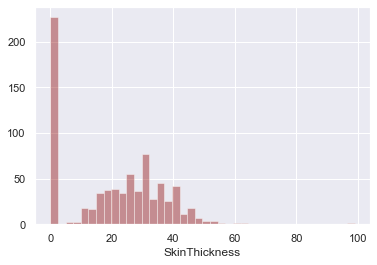

In [22]:
sns.distplot(diabetes['SkinThickness'],kde=False,color='darkred',bins=40)

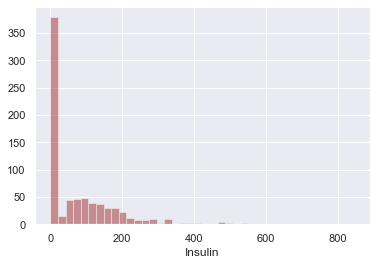

In [23]:
sns.distplot(diabetes['Insulin'],kde=False,color='darkred',bins=40)

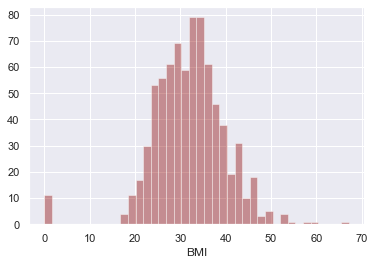

In [24]:
sns.distplot(diabetes['BMI'],kde=False,color='darkred',bins=40)

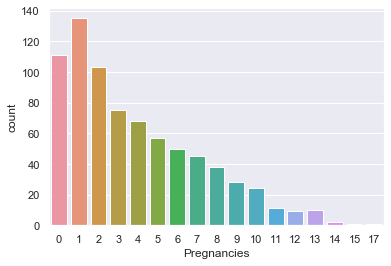

In [25]:
sns.countplot(x='Pregnancies', data=diabetes)


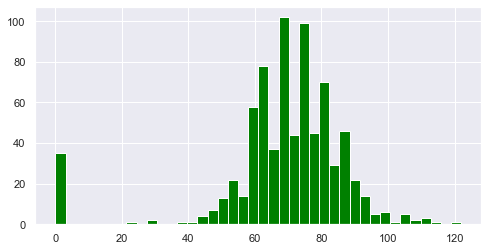

In [26]:
diabetes['BloodPressure'].hist(color='green',bins=40,figsize=(8,4))

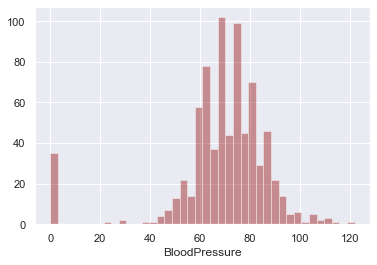

In [27]:
sns.distplot(diabetes['BloodPressure'],kde=False,color='darkred',bins=40)

## Univariate Analysis


In [28]:
diabetic=diabetes.loc[diabetes['Outcome']==1]
non_diabetic=diabetes.loc[diabetes['Outcome']==0]

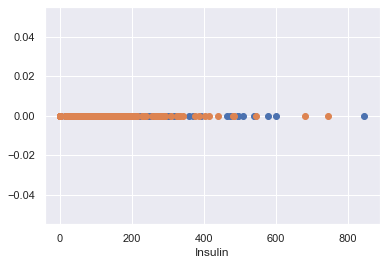

In [31]:
plt.plot(diabetic['Insulin'],np.zeros_like(diabetic['Insulin']),'o')
plt.plot(non_diabetic['Insulin'],np.zeros_like(non_diabetic['Insulin']),'o')
plt.xlabel('Insulin')
plt.show()

## Bivariate Analysis

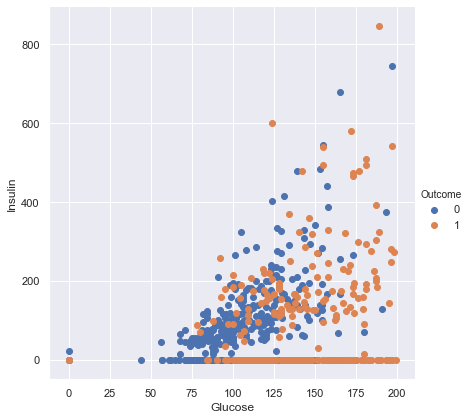

In [32]:
sns.FacetGrid(diabetes,hue='Outcome',height=6).map(plt.scatter,'Glucose','Insulin').add_legend()
plt.show()

### Multivariate Analysis

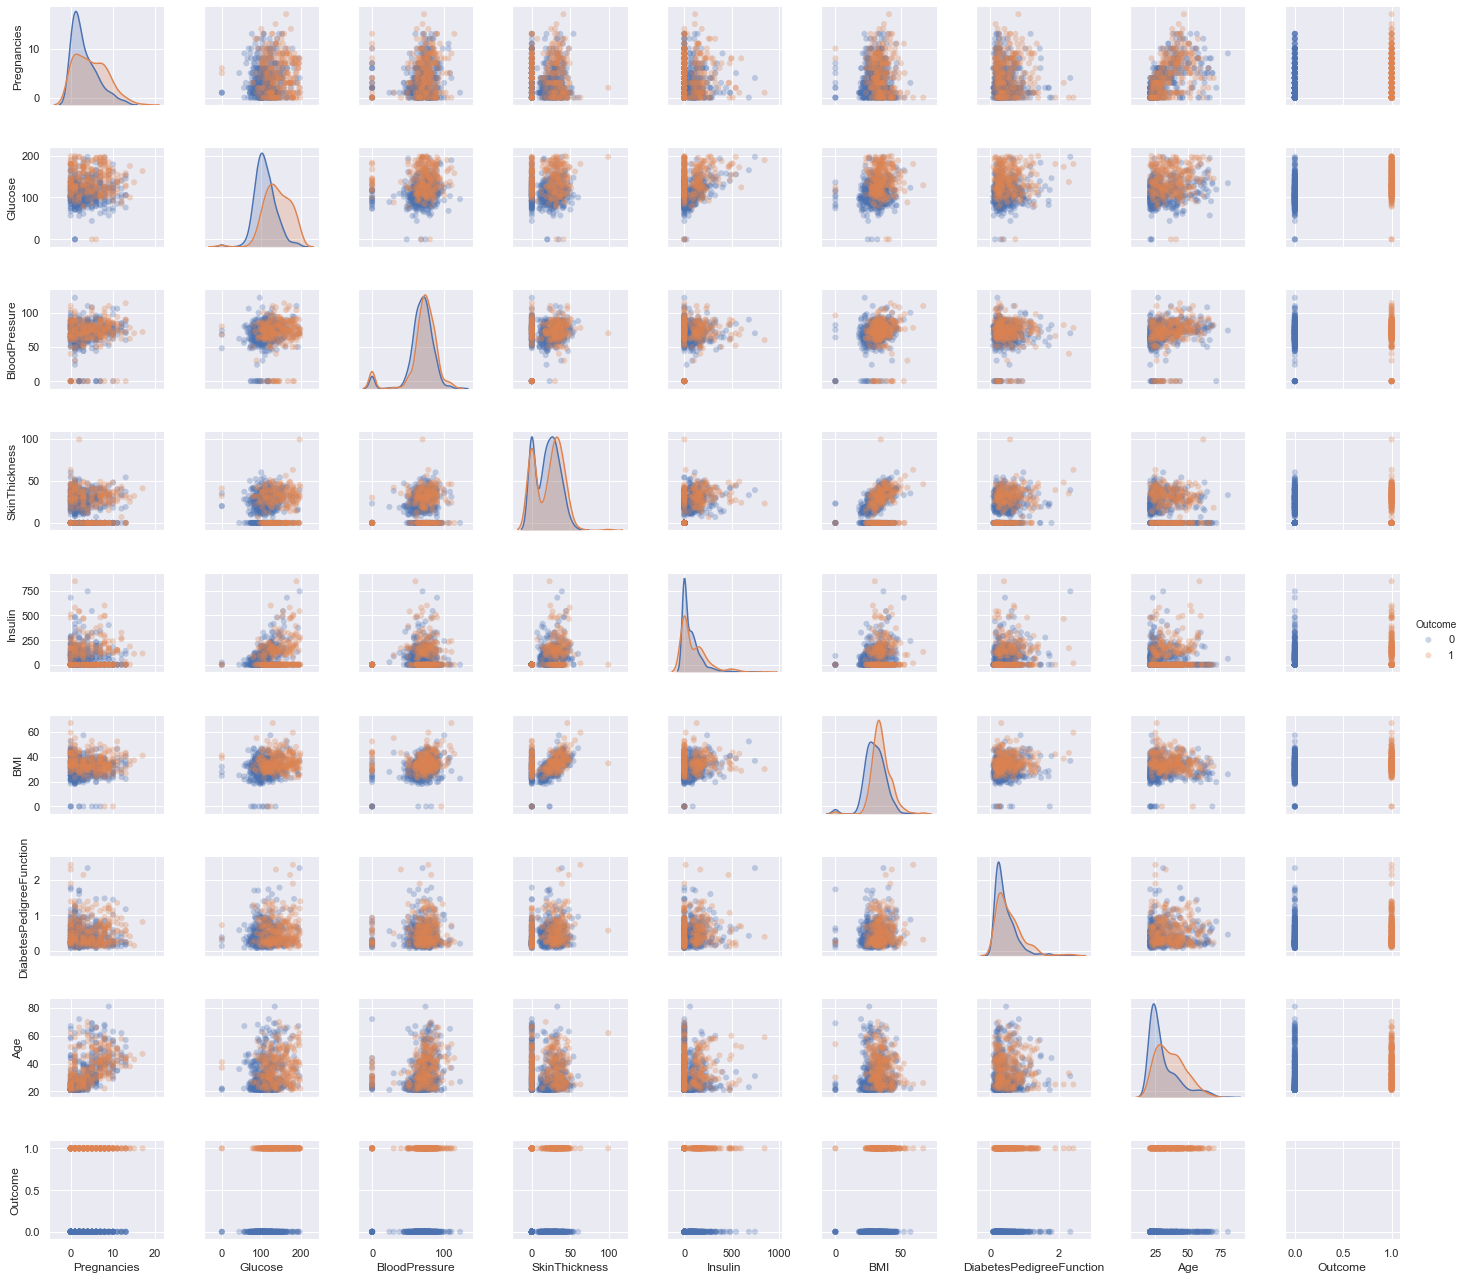

In [34]:
# to visualise pair plot
sns.pairplot(diabetes, hue='Outcome', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)
plt.show()


## Correlation Matrix
A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows you to see which pairs have the highest correlation.



In [33]:
#Pearson Correlation Cofficient
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [34]:
mask = np.zeros_like(diabetes.corr())
traingle_indices=np.triu_indices_from(mask)
mask[traingle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

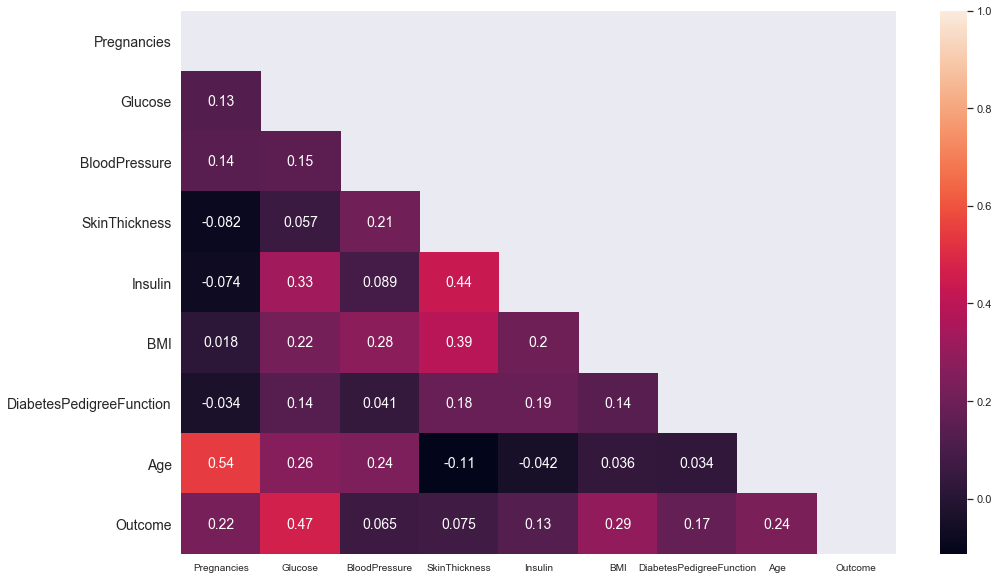

In [35]:
plt.figure(figsize=(16,10))
sns.heatmap(diabetes.corr(),mask=mask, annot=True, annot_kws={"size" : 14})
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=14)
plt.show()

## Replacing Missing Values Inside Data

In [36]:
diabetes['Glucose'].mean()

120.89453125

In [37]:
diabetes['Glucose'].median()

117.0

In [38]:
diabetes['Glucose'] = diabetes['Glucose'].replace(0, diabetes['Glucose'].median())
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0, diabetes['BloodPressure'].median())
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(0, diabetes['SkinThickness'].median())
diabetes['Insulin'] = diabetes['Insulin'].replace(0, diabetes['Insulin'].median())   
diabetes['BMI'] = diabetes['BMI'].replace(0, diabetes['BMI'].median())
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


## Visualization of Data After Removing Null Values

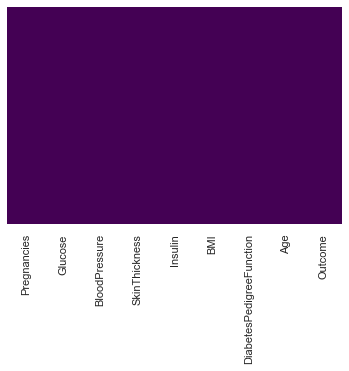

In [39]:
sns.heatmap(diabetes.isnull() , yticklabels=False , cbar=False , cmap='viridis')

## Removing Outliers from the data

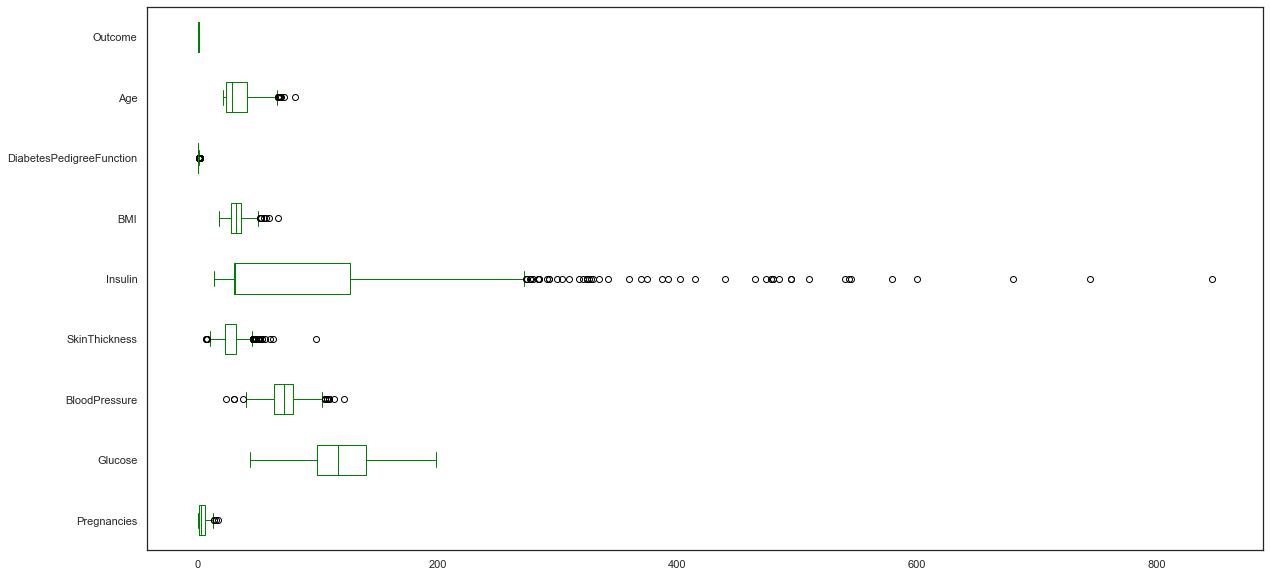

In [40]:
diabetes.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

In [42]:
SkinThickness_Outliers = diabetes['SkinThickness'].to_list()
Insulin_outliers = diabetes['Insulin'].to_list()

In [43]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [44]:
outlier_pt=detect_outliers(SkinThickness_Outliers)
outlier_pt

[60, 56, 63, 99]

In [45]:
outlier_pt=detect_outliers(Insulin_outliers)
outlier_pt

[60,
 56,
 63,
 99,
 543.0,
 846.0,
 495.0,
 485.0,
 495.0,
 478.0,
 744.0,
 680.0,
 545.0,
 465.0,
 415.0,
 579.0,
 474.0,
 480.0,
 600.0,
 440.0,
 540.0,
 480.0,
 510.0]

In [46]:
diabetes=diabetes[diabetes['SkinThickness']<80]
diabetes=diabetes[diabetes['Insulin']<=600]
print(diabetes.shape)

(764, 9)


## Data Modelling
We will work with six classification Algorithms.
1. KNN
2. Decision trees
3. Logistic Regression
4. SVM
5. Naive Bayes
6. Random Forest

## K-NEAREST NEIGHBOURS

In [47]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [48]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.635994,0.886209,-0.031925,0.877504,-0.634620,0.172373,0.484626,1.437851
1,-0.847216,-1.205954,-0.528011,0.200433,-0.634620,-0.849747,-0.364440,-0.186923
2,1.229278,2.048522,-0.693372,-0.476638,-0.634620,-1.331603,0.623061,-0.101408
3,-0.847216,-1.073118,-0.528011,-0.476638,0.019184,-0.630721,-0.930484,-1.042067
4,-1.143858,0.520911,-2.677714,0.877504,0.781097,1.559535,5.594406,-0.015894


In [49]:
#X = diabetes.drop("Outcome",axis = 1)
y = diabetes.Outcome


## Train Test Split Cross Validation methods

In [50]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [51]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [52]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [53]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.6078431372549 % and k = [11]


## Result Visualisation

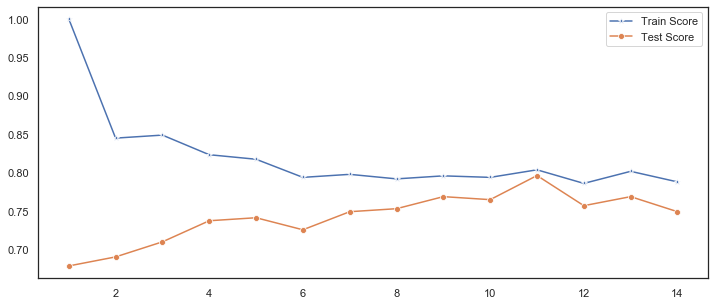

In [54]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

The best result is captured at k = 11 hence 11 is used for the final model


In [55]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.796078431372549

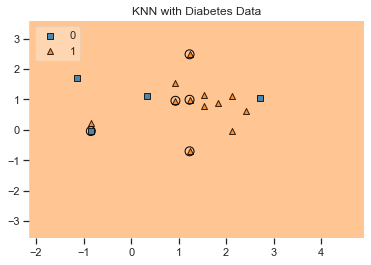

In [56]:
## trying to plot decision boundary 
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

## Model Performance Analysis
1. Confusion Matrix
The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.

In [57]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,152,14,166
1,38,51,89
All,190,65,255


In [59]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

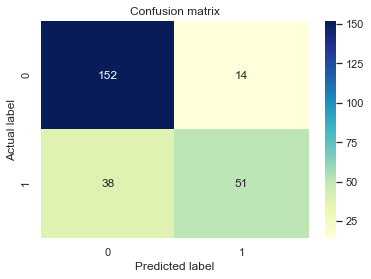

In [58]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       166
           1       0.78      0.57      0.66        89

    accuracy                           0.80       255
   macro avg       0.79      0.74      0.76       255
weighted avg       0.79      0.80      0.79       255



## ROC - AUC
ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

In [60]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

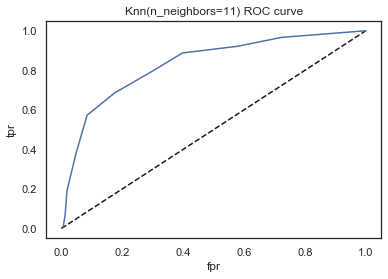

In [61]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()


In [62]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8311899282523352

## Hyper Parameter optimization
Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

Let’s consider the following example:

Suppose, a machine learning model X takes hyperparameters a1, a2 and a3. In grid searching, you first define the range of values for each of the hyperparameters a1, a2 and a3. You can think of this as an array of values for each of the hyperparameters. Now the grid search technique will construct many versions of X with all the possible combinations of hyperparameter (a1, a2 and a3) values that you defined in the first place. This range of hyperparameter values is referred to as the grid.

Suppose, you defined the grid as: a1 = [0,1,2,3,4,5] a2 = [10,20,30,40,5,60] a3 = [105,105,110,115,120,125]

Note that, the array of values of that you are defining for the hyperparameters has to be legitimate in a sense that you cannot supply Floating type values to the array if the hyperparameter only takes Integer values.

Now, grid search will begin its process of constructing several versions of X with the grid that you just defined.
It will start with the combination of [0,10,105], and it will end with [5,60,125]. It will go through all the intermediate combinations between these two which makes grid search computationally very expensive.

In [63]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7840314136125655
Best Parameters: {'n_neighbors': 28}


## Decision Trees.

In [64]:
# feature selection
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [65]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [66]:
# build model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)


In [67]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0]


Text(0.5, 12.5, 'Predicted label')

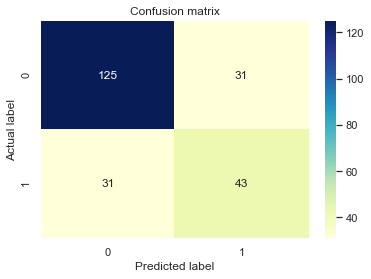

In [68]:
y_pred = classifier.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [86]:
# accuracy
print("Accuracy:", metrics.accuracy_score(Y_test,y_pred))

Accuracy: 0.7304347826086957


In [78]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       156
           1       0.58      0.58      0.58        74

    accuracy                           0.73       230
   macro avg       0.69      0.69      0.69       230
weighted avg       0.73      0.73      0.73       230



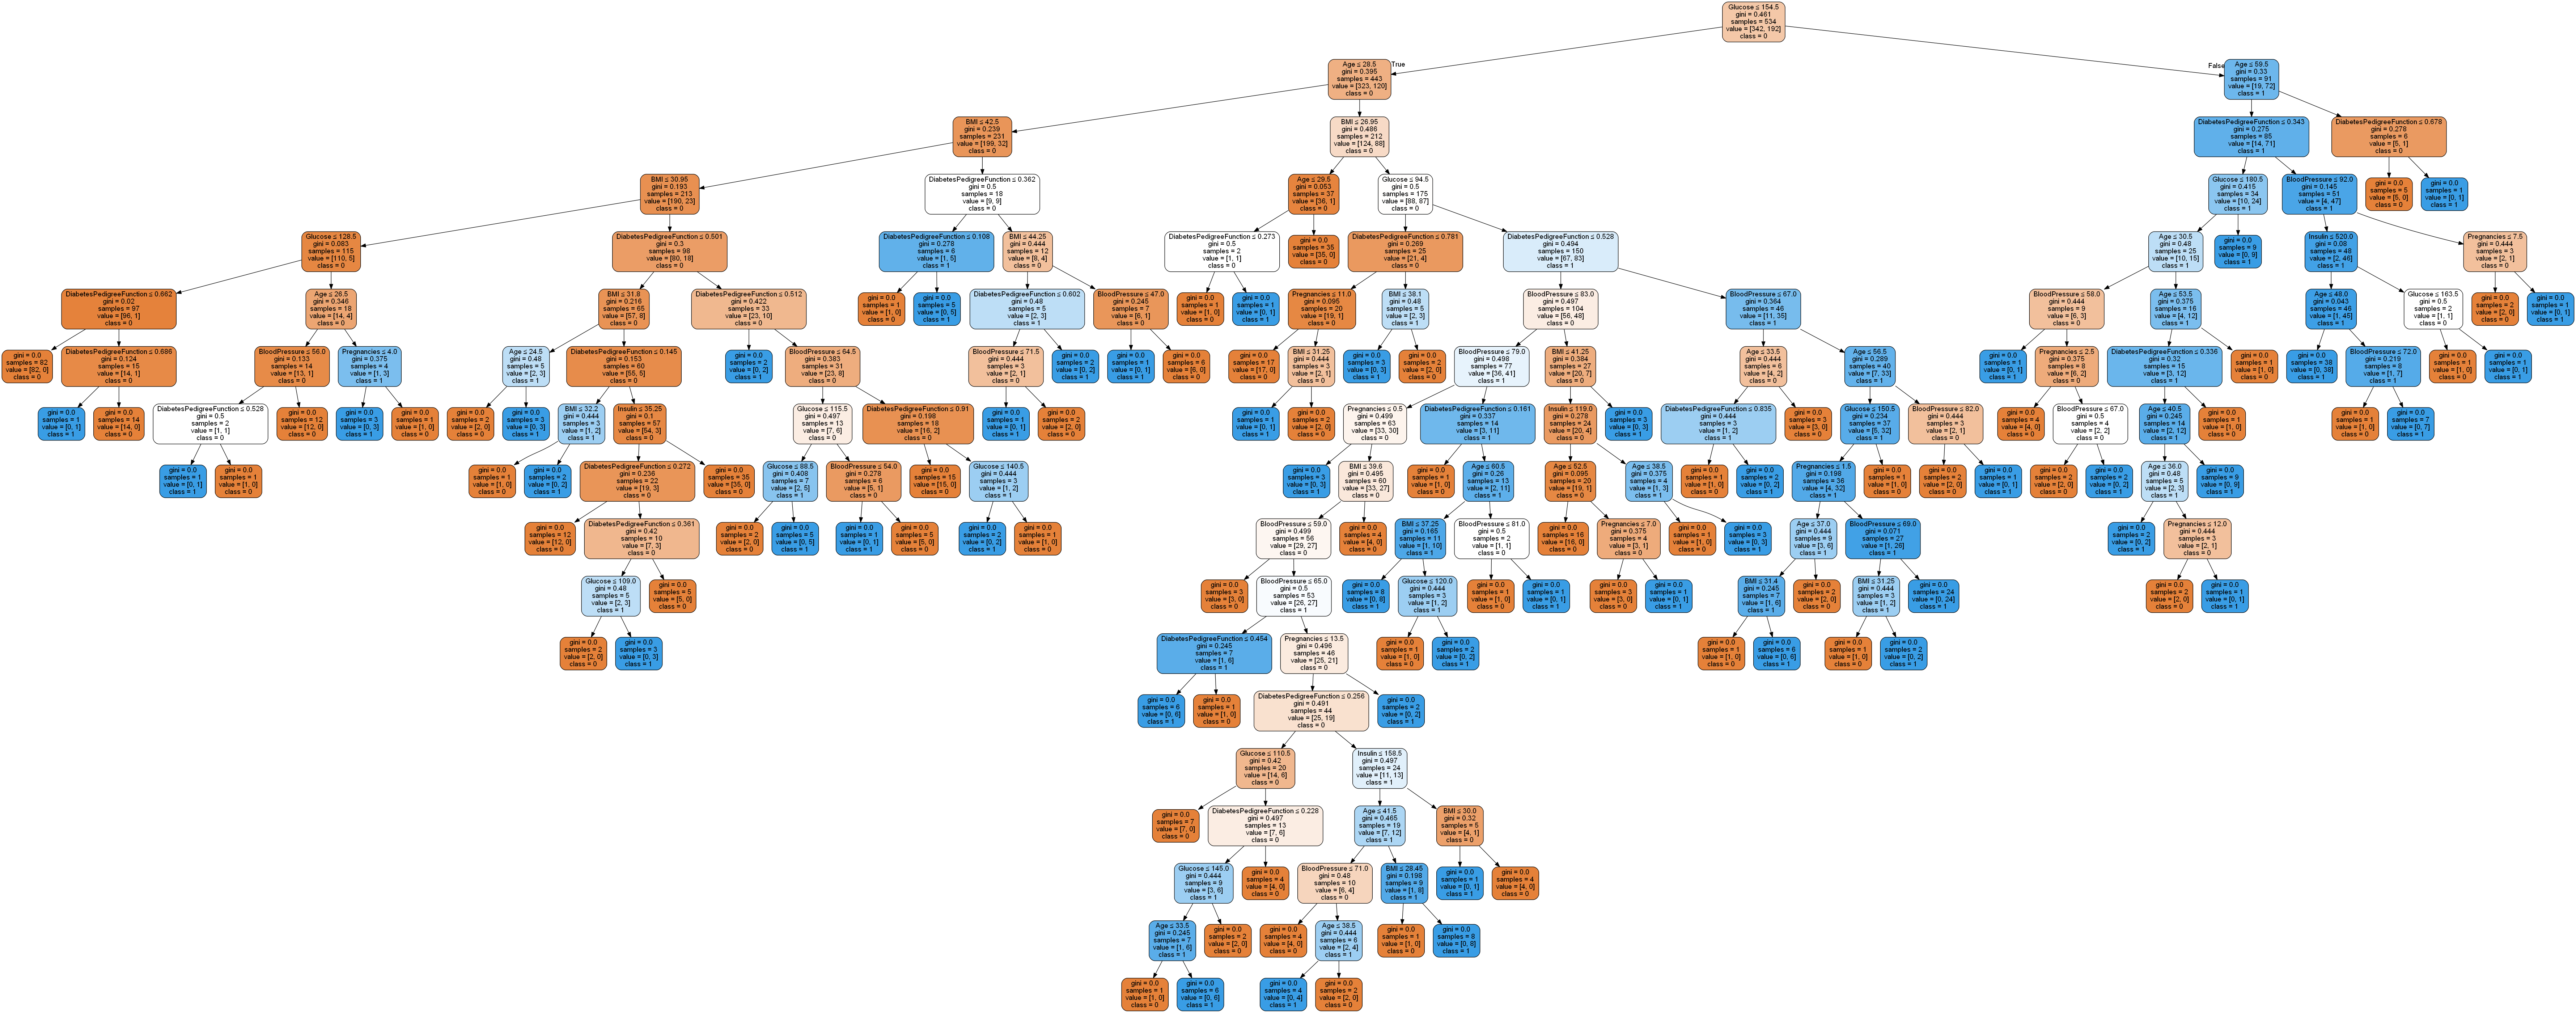

In [77]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
%matplotlib inline 
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())